In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [150]:
df = pd.read_csv('data_science_job.csv')

In [152]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [154]:
from sklearn.impute import SimpleImputer

In [160]:
df.fillna(method = 'ffill' , inplace = True)

C:\Users\siddh\AppData\Local\Temp\ipykernel_6136\1330312180.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = 'ffill' , inplace = True)


In [71]:
from sklearn.preprocessing import OneHotEncoder
obj1 = OneHotEncoder(sparse_output=False)

In [55]:
df2 = pd.DataFrame(obj1.fit_transform(df[['gender']]),columns = ['F','Gender','Others'])

In [59]:
df2.drop(['F','Others'],axis = 1,inplace = True)

In [61]:
df['gender'] = df2

In [89]:
df.head(1)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.92,1.0,Has relevent experience,no_enrollment,4.0,STEM,20.0,50-99,Pvt Ltd,36.0,1.0


In [79]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

In [81]:
dict = {'Masters':5
       ,'Graduate':4,'':3,'High School':2,'Primary School':1
       }

In [87]:
df['education_level'] = df['education_level'].map(dict)

In [95]:
newData = df.select_dtypes(include = 'object')

In [99]:
newData.columns

Index(['city', 'relevent_experience', 'enrolled_university',
       'major_discipline', 'company_size', 'company_type'],
      dtype='object')

In [101]:
from sklearn.preprocessing import LabelEncoder

In [105]:
obj = LabelEncoder()
arr = obj.fit_transform(newData['city'])

In [136]:
for x in newData.columns:
    arr = obj.fit_transform(newData[x])
    new = pd.DataFrame(arr,columns = [x])
    newData[x] = new

In [142]:
for x in newData.columns:
    df[x] = newData[x]

In [144]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,5,0.920,1.0,0,2,4.0,5,20.0,4,5,36.0,1.0
1,29725,77,0.776,1.0,1,2,4.0,5,15.0,4,5,47.0,0.0
2,11561,64,0.624,1.0,1,0,4.0,5,5.0,4,5,83.0,0.0
3,33241,14,0.789,1.0,1,0,4.0,1,0.0,4,5,52.0,1.0
4,666,50,0.767,1.0,0,2,5.0,5,20.0,4,1,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,0.878,1.0,1,2,4.0,2,14.0,0,1,42.0,1.0
19154,31398,5,0.920,1.0,0,2,4.0,5,14.0,0,1,52.0,1.0
19155,24576,5,0.920,1.0,0,2,4.0,5,20.0,4,5,44.0,0.0
19156,5756,94,0.802,1.0,0,2,2.0,5,0.0,5,5,97.0,0.0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int32  
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  float64
 4   relevent_experience     19158 non-null  int32  
 5   enrolled_university     19158 non-null  int32  
 6   education_level         18738 non-null  float64
 7   major_discipline        19158 non-null  int32  
 8   experience              19158 non-null  float64
 9   company_size            19158 non-null  int32  
 10  company_type            19158 non-null  int32  
 11  training_hours          19158 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(6), int32(6), int64(1)
memory usage: 1.5 MB


In [170]:
df.describe()

,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828947,9.927602,65.237864,0.249348
std,9616.292592,0.123280,6.503755,59.994225,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


<Axes: xlabel='training_hours'>

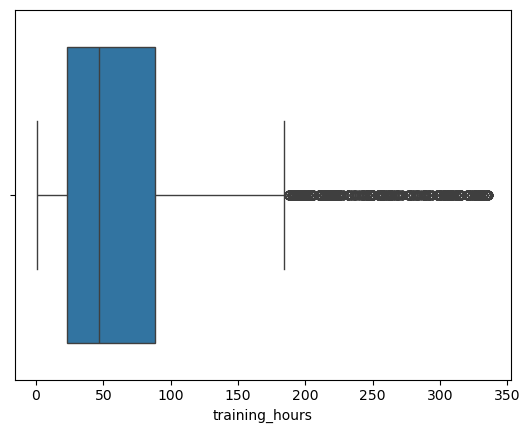

In [182]:
sns.boxplot(x = 'training_hours', data = df)

In [205]:
Q1 = new_dataset['training_hours'].quantile(0.25)
Q3 = new_dataset['training_hours'].quantile(0.75)

Q1

22.0

In [193]:
Q3

88.0

In [207]:
IQR = Q3 - Q1
min_value = Q1 - (1.5 * IQR)
max_value = Q3 + (1.5 * IQR)
min_value,max_value

(-65.0, 167.0)

In [209]:
new_dataset = df[df['training_hours'] <= max_value]

<Axes: xlabel='training_hours'>

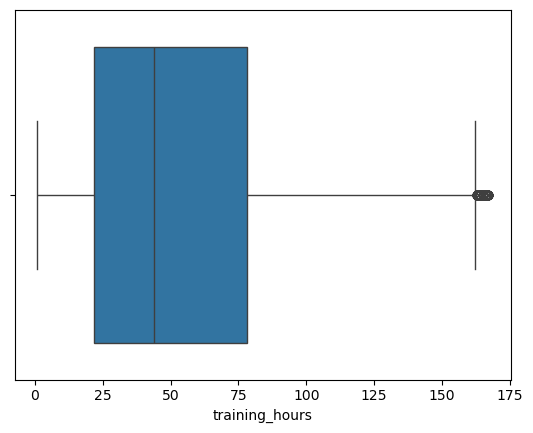

In [211]:
sns.boxplot(x = 'training_hours', data = new_dataset)